In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

sns.set_theme('paper', style='dark')
datasets = ['SOF-1', 'SOF-2', 'JIRA-1', 'JIRA-2', 'Github', 'AppReview']

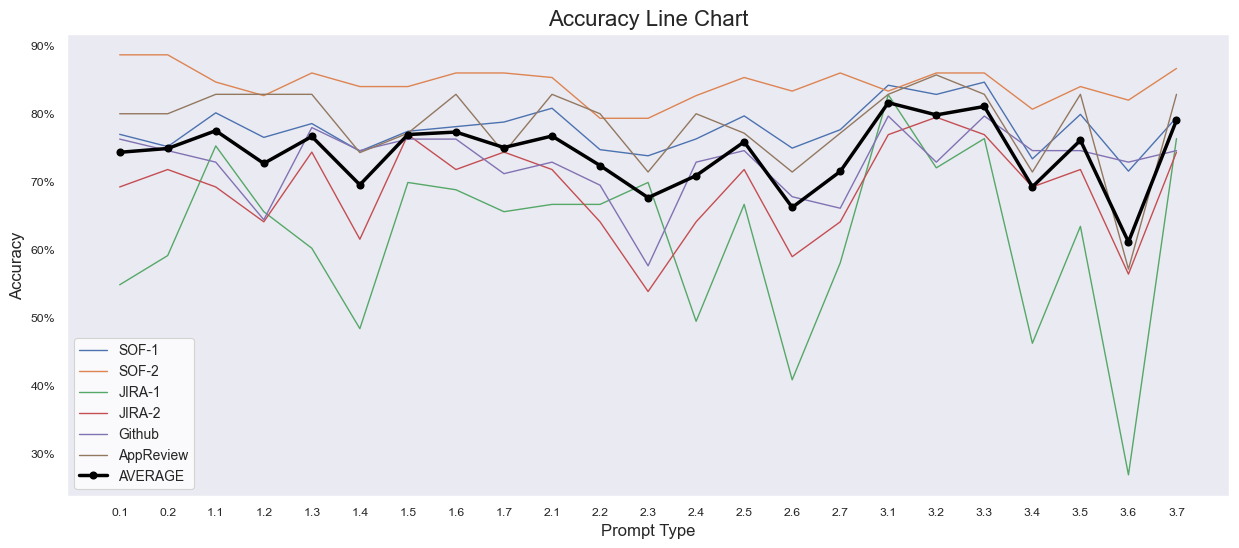

In [16]:

plt.figure(figsize=(15, 6))
plt.title('Accuracy Line Chart', fontsize=16)
plt.xlabel('Prompt Type', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  

sum = {}

for dataset in datasets:
    data = pd.read_csv(f'./analysis_data/data_{dataset}.csv')
    accuracy = list(data['accuracy'])
    index = list(map(lambda x: str(x), list(data['index'])))
    plt.plot(index, accuracy, label=dataset, linewidth=1)
    
    for row in data.itertuples():
        if row.index in sum:
            sum[row.index] += row.accuracy
        else:
            sum[row.index] = row.accuracy  

index, value = zip(*[(key, sum[key]/6) for key in sum.copy()])
plt.plot(list(map(lambda x: str(x), list(index))), list(value), label='AVERAGE', linewidth=2.5, marker='o', color='black')

plt.legend(loc='lower left', fontsize=10, facecolor='white')
plt.savefig('Accuracy Line Chart.png', dpi=300)
plt.show()


